In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged = clinical_trial.merge(mouse_drug, on='Mouse ID', how='outer')

# Display the data table for preview
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

tumor = merged[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
a = tumor.groupby(['Drug', 'Timepoint']).mean()

# Reset the index
tumor_response_df = a.reset_index()
tumor_response_df.head(11)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

b = tumor.groupby(['Drug', 'Timepoint']).sem()

# Reset the index
tumor_volume_df = b.reset_index()
tumor_volume_df.head(15)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mean = tumor_response_df.pivot_table(index=['Timepoint'], columns='Drug',
                     values='Tumor Volume (mm3)', aggfunc='first')

# Preview that Reformatting worked
reformat_mean.head(15)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Add index row to plot columns by name
tumor_vol_index = reformat_mean.reset_index()
tumor_vol_index

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [6]:
# Reformat error data dataframe
reformat_error = tumor_volume_df.pivot_table(index=['Timepoint'], columns='Drug',
                     values='Tumor Volume (mm3)', aggfunc='first')

# Preview that Reformatting worked
reformat_error.head(15)

# Add index row to plot columns by name
tumor_volume_error = reformat_error.reset_index()
tumor_volume_error

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


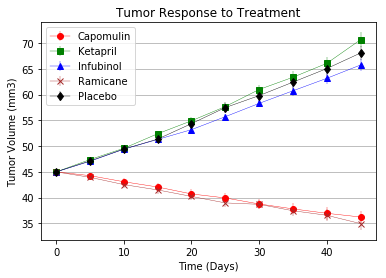

In [62]:
# Generate the Plot (with Error Bars)

# plot several lines on the same axis, indicated here and on each line as ax=ax
ax = plt.gca()

# Create a title, x label, and y label for our chart
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Set a grid on the plot
ax.yaxis.grid()

# Plot lines with errorbars 
plt.errorbar(tumor_vol_index['Timepoint'], tumor_vol_index['Capomulin'], yerr=tumor_volume_error['Capomulin'], color='red', marker='o', linewidth =0.4)
plt.errorbar(tumor_vol_index['Timepoint'], tumor_vol_index['Ketapril'], yerr=tumor_volume_error['Ketapril'], color='green', marker='s', linewidth =0.4)
plt.errorbar(tumor_vol_index['Timepoint'], tumor_vol_index['Infubinol'], yerr=tumor_volume_error['Infubinol'], color='blue', marker='^', linewidth =0.4)
plt.errorbar(tumor_vol_index['Timepoint'], tumor_vol_index['Ramicane'], yerr=tumor_volume_error['Ramicane'], color='brown', marker='x', linewidth =0.4)
plt.errorbar(tumor_vol_index['Timepoint'], tumor_vol_index['Placebo'], yerr=tumor_volume_error['Placebo'], color='black', marker='d', linewidth =0.4)

# Add the legend
plt.legend(['Capomulin', 'Ketapril', 'Infubinol', 'Ramicane','Placebo'], loc='best')

# Show the Figure
plt.show()


In [65]:
# Save the Figure
plt.savefig("../Images/TumorVolume.png")

<Figure size 432x288 with 0 Axes>

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

metastatic_sites = merged[['Drug', 'Timepoint', 'Metastatic Sites']]
metastatic_mean = metastatic_sites.groupby(['Drug', 'Timepoint']).mean()
metastatic_mean.head(15)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

metastatic_std_error = metastatic_sites.groupby(['Drug', 'Timepoint']).sem()
metastatic_std_error.head(15)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034

In [11]:
# Minor Data Munging to Re-Format the Data Frames
reformat_met_mean = metastatic_mean.pivot_table(index=['Timepoint'], columns='Drug',
                     values='Metastatic Sites', aggfunc='first')
# Preview that Reformatting worked
reformat_met_mean.head(15)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [12]:
# Add index
metastatic = reformat_met_mean.reset_index()
metastatic

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


In [13]:
# Minor Data Munging to Re-Format the Data Frames
met_error = metastatic_std_error.pivot_table(index=['Timepoint'], columns='Drug',
                     values='Metastatic Sites', aggfunc='first')
metastatic_error = met_error.reset_index()
metastatic_error


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
5,25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
6,30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
7,35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
8,40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791
9,45,0.202591,0.286101,0.309320,0.278722,0.351104,0.304240,0.428571,0.190221,0.359062,0.286400


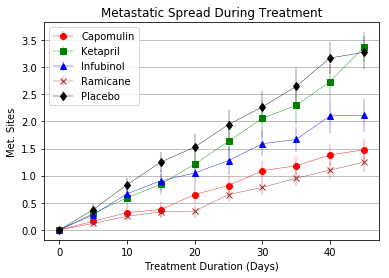

In [63]:
# Generate the Plot (with Error Bars)

# plot several lines on the same axis, indicated here and on each line as ax=ax
ax = plt.gca()

# Create a title, x label, and y label for our chart
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Set a grid on the plot
ax.yaxis.grid()

# Plot lines with errorbars 
plt.errorbar(metastatic['Timepoint'], metastatic['Capomulin'], yerr=metastatic_error['Capomulin'], color='red', marker='o', linewidth =0.4)
plt.errorbar(metastatic['Timepoint'], metastatic['Ketapril'], yerr=metastatic_error['Ketapril'], color='green', marker='s', linewidth =0.4)
plt.errorbar(metastatic['Timepoint'], metastatic['Infubinol'], yerr=metastatic_error['Infubinol'], color='blue', marker='^', linewidth =0.4)
plt.errorbar(metastatic['Timepoint'], metastatic['Ramicane'], yerr=metastatic_error['Ramicane'], color='brown', marker='x', linewidth =0.4)
plt.errorbar(metastatic['Timepoint'], metastatic['Placebo'], yerr=metastatic_error['Placebo'], color='black', marker='d', linewidth =0.4)

# Add the legend
plt.legend(['Capomulin', 'Ketapril', 'Infubinol', 'Ramicane','Placebo'], loc='best')

# Show the Figure
plt.show()

In [64]:
# Save the Figure
plt.savefig("../Images/MetastaticSpread.png")


<Figure size 432x288 with 0 Axes>

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
mouse_count = merged[['Drug', 'Timepoint', 'Mouse ID']]
mouse_count_grouped = mouse_count.groupby(['Drug', 'Timepoint']).count()
mouse_count_grouped.head(15)

# Reset the index
mouse_count_grouped_df = mouse_count_grouped.reset_index()
mouse_count_grouped_df.head(11)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [17]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mouse_count = mouse_count_grouped.pivot_table(index=['Timepoint'], columns='Drug',
                     values='Mouse ID', aggfunc='first')
# Preview that Reformatting worked
reformat_mouse_count.head(15)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [18]:
# Add index row to plot columns by name
survival_rates = reformat_mouse_count.reset_index()
survival_rates

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [19]:
# Create Capomulin dataframe and calculate percent survival
survival_capomulin_df = pd.DataFrame(survival_rates, columns = ['Timepoint', 'Capomulin'])
survival_capomulin_df

,Timepoint,Capomulin
0,0,25
1,5,25
2,10,25
3,15,24
4,20,23
5,25,22
6,30,22
7,35,22
8,40,21
9,45,21


In [20]:
mice_percent_capomulin = []
mice_count = 25
for mice in survival_capomulin_df['Capomulin']:
    percent_survive = mice/mice_count*100
    mice_percent_capomulin.append(percent_survive)

survival_capomulin_df['Capomulin Percent Survival'] = mice_percent_capomulin
survival_capomulin_df

,Timepoint,Capomulin,Capomulin Percent Survival
0,0,25,100.0
1,5,25,100.0
2,10,25,100.0
3,15,24,96.0
4,20,23,92.0
5,25,22,88.0
6,30,22,88.0
7,35,22,88.0
8,40,21,84.0
9,45,21,84.0


In [21]:
# Create Infubinol dataframe and calculate percent survival
survival_infubinol_df = pd.DataFrame(survival_rates, columns = ['Timepoint', 'Infubinol'])
survival_infubinol_df

,Timepoint,Infubinol
0,0,25
1,5,25
2,10,21
3,15,21
4,20,20
5,25,18
6,30,17
7,35,12
8,40,10
9,45,9


In [22]:
mice_percent_infubinol = []
mice_count = 25
for mice in survival_infubinol_df['Infubinol']:
    percent_survive = mice/mice_count*100
    mice_percent_infubinol.append(percent_survive)

survival_infubinol_df['Infubinol Percent Survival'] = mice_percent_infubinol
survival_infubinol_df

,Timepoint,Infubinol,Infubinol Percent Survival
0,0,25,100.0
1,5,25,100.0
2,10,21,84.0
3,15,21,84.0
4,20,20,80.0
5,25,18,72.0
6,30,17,68.0
7,35,12,48.0
8,40,10,40.0
9,45,9,36.0


In [23]:
# Create Ketapril dataframe and calculate percent survival
survival_ketapril_df = pd.DataFrame(survival_rates, columns = ['Timepoint', 'Ketapril'])
survival_ketapril_df

,Timepoint,Ketapril
0,0,25
1,5,23
2,10,22
3,15,19
4,20,19
5,25,19
6,30,18
7,35,17
8,40,15
9,45,11


In [24]:
mice_percent_ketapril = []
mice_count = 25
for mice in survival_ketapril_df['Ketapril']:
    percent_survive = mice/mice_count*100
    mice_percent_ketapril.append(percent_survive)
        
#print(mice_percent_ketapril)

survival_ketapril_df['Ketapril Percent Survival'] = mice_percent_ketapril
survival_ketapril_df

,Timepoint,Ketapril,Ketapril Percent Survival
0,0,25,100.0
1,5,23,92.0
2,10,22,88.0
3,15,19,76.0
4,20,19,76.0
5,25,19,76.0
6,30,18,72.0
7,35,17,68.0
8,40,15,60.0
9,45,11,44.0


In [25]:
# Create Placebo dataframe and calculate percent survival
survival_placebo_df = pd.DataFrame(survival_rates, columns = ['Timepoint', 'Placebo'])
survival_placebo_df

,Timepoint,Placebo
0,0,25
1,5,24
2,10,24
3,15,20
4,20,19
5,25,17
6,30,15
7,35,14
8,40,12
9,45,11


In [53]:
mice_percent_placebo = []
mice_count = 25
for mice in survival_placebo_df['Placebo']:
    percent_survive = mice/mice_count*100
    mice_percent_placebo.append(percent_survive)

survival_placebo_df['Placebo Percent Survival'] = mice_percent_placebo
survival_placebo_df

,Timepoint,Placebo,Placebo Percent Survival
0,0,25,100.0
1,5,24,96.0
2,10,24,96.0
3,15,20,80.0
4,20,19,76.0
5,25,17,68.0
6,30,15,60.0
7,35,14,56.0
8,40,12,48.0
9,45,11,44.0


In [52]:
# Create Ramicane dataframe and calculate percent survival
survival_ramicane_df = pd.DataFrame(survival_rates, columns = ['Timepoint', 'Ramicane'])
survival_ramicane_df

,Timepoint,Ramicane
0,0,25
1,5,25
2,10,24
3,15,24
4,20,23
5,25,23
6,30,23
7,35,21
8,40,20
9,45,20


In [55]:
mice_percent_ramicane = []
mice_count = 25
for mice in survival_ramicane_df['Ramicane']:
    percent_survive = mice/mice_count*100
    mice_percent_ramicane.append(percent_survive)

survival_ramicane_df['Ramicane Percent Survival'] = mice_percent_ramicane
survival_ramicane_df

,Timepoint,Ramicane,Ramicane Percent Survival
0,0,25,100.0
1,5,25,100.0
2,10,24,96.0
3,15,24,96.0
4,20,23,92.0
5,25,23,92.0
6,30,23,92.0
7,35,21,84.0
8,40,20,80.0
9,45,20,80.0


In [27]:
# Merge Capomulin survival (survival_capomulin_df) with Infubinol Survival (survival_infubinol_df) on Timepoint
survival1 = pd.merge(survival_capomulin_df, survival_infubinol_df, on='Timepoint')
survival1


,Timepoint,Capomulin,Capomulin Percent Survival,Infubinol,Infubinol Percent Survival
0,0,25,100.0,25,100.0
1,5,25,100.0,25,100.0
2,10,25,100.0,21,84.0
3,15,24,96.0,21,84.0
4,20,23,92.0,20,80.0
5,25,22,88.0,18,72.0
6,30,22,88.0,17,68.0
7,35,22,88.0,12,48.0
8,40,21,84.0,10,40.0
9,45,21,84.0,9,36.0


In [28]:
# Merge above df (survival1) with Ketapril Survival (survival_ketapril_df) on Timepoint
survival2 = pd.merge(survival1, survival_ketapril_df, on='Timepoint')
survival2

,Timepoint,Capomulin,Capomulin Percent Survival,Infubinol,Infubinol Percent Survival,Ketapril,Ketapril Percent Survival
0,0,25,100.0,25,100.0,25,100.0
1,5,25,100.0,25,100.0,23,92.0
2,10,25,100.0,21,84.0,22,88.0
3,15,24,96.0,21,84.0,19,76.0
4,20,23,92.0,20,80.0,19,76.0
5,25,22,88.0,18,72.0,19,76.0
6,30,22,88.0,17,68.0,18,72.0
7,35,22,88.0,12,48.0,17,68.0
8,40,21,84.0,10,40.0,15,60.0
9,45,21,84.0,9,36.0,11,44.0


In [56]:
# Merge above df (survival2) with Ramicane Survival (survival_ramicane_df) on Timepoint
survival3 = pd.merge(survival2, survival_ramicane_df, on='Timepoint')
survival3

,Timepoint,Capomulin,Capomulin Percent Survival,Infubinol,Infubinol Percent Survival,Ketapril,Ketapril Percent Survival,Ramicane,Ramicane Percent Survival
0,0,25,100.0,25,100.0,25,100.0,25,100.0
1,5,25,100.0,25,100.0,23,92.0,25,100.0
2,10,25,100.0,21,84.0,22,88.0,24,96.0
3,15,24,96.0,21,84.0,19,76.0,24,96.0
4,20,23,92.0,20,80.0,19,76.0,23,92.0
5,25,22,88.0,18,72.0,19,76.0,23,92.0
6,30,22,88.0,17,68.0,18,72.0,23,92.0
7,35,22,88.0,12,48.0,17,68.0,21,84.0
8,40,21,84.0,10,40.0,15,60.0,20,80.0
9,45,21,84.0,9,36.0,11,44.0,20,80.0


In [57]:
# Merge above df (survival3) with Placebo Survival (survival_placebo_df) on Timepoint
survival_rates_percent = pd.merge(survival3, survival_placebo_df, on='Timepoint')
survival_rates_percent

,Timepoint,Capomulin,Capomulin Percent Survival,Infubinol,Infubinol Percent Survival,Ketapril,Ketapril Percent Survival,Ramicane,Ramicane Percent Survival,Placebo,Placebo Percent Survival
0,0,25,100.0,25,100.0,25,100.0,25,100.0,25,100.0
1,5,25,100.0,25,100.0,23,92.0,25,100.0,24,96.0
2,10,25,100.0,21,84.0,22,88.0,24,96.0,24,96.0
3,15,24,96.0,21,84.0,19,76.0,24,96.0,20,80.0
4,20,23,92.0,20,80.0,19,76.0,23,92.0,19,76.0
5,25,22,88.0,18,72.0,19,76.0,23,92.0,17,68.0
6,30,22,88.0,17,68.0,18,72.0,23,92.0,15,60.0
7,35,22,88.0,12,48.0,17,68.0,21,84.0,14,56.0
8,40,21,84.0,10,40.0,15,60.0,20,80.0,12,48.0
9,45,21,84.0,9,36.0,11,44.0,20,80.0,11,44.0


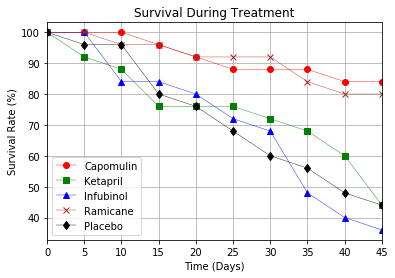

<Figure size 432x288 with 0 Axes>

In [73]:
# Generate the Plot (Accounting for percentages)
# set limit of x (all drug data ends at 45 days)
#x_lower = survival_rates_percent['Timepoint'[0]]
#x_upper = survival_rates_percent['Timepoint'[-1]]
#plt.xticks(x_lower, x_upper, 10)
#x_axis = np.arange(-5, 50)

# plot several lines on the same axis, indicated here and on each line as ax=ax
ax = plt.gca()

# Plot 4 drugs plus placebo for survival rates (percentage) over days (Timepoint)
survival_rates_percent.plot(kind='line',x='Timepoint',y='Capomulin Percent Survival',color='red',marker = 'o',linewidth = 0.4,ax=ax)
survival_rates_percent.plot(kind='line',x='Timepoint',y='Ketapril Percent Survival',color='green', marker='s',linewidth = 0.4,ax=ax)
survival_rates_percent.plot(kind='line',x='Timepoint',y='Infubinol Percent Survival',color='blue',marker='^',linewidth = 0.4,ax=ax)
survival_rates_percent.plot(kind='line',x='Timepoint',y='Ramicane Percent Survival',color='brown',marker='x',linewidth = 0.4,ax=ax)
survival_rates_percent.plot(kind='line',x='Timepoint',y='Placebo Percent Survival',color='black',marker='d',linewidth = 0.4,ax=ax)

# Create a title, x label, and y label for our chart
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Set a grid on the plot
ax.xaxis.grid()
ax.yaxis.grid()

# Add the legend
plt.legend(['Capomulin', 'Ketapril', 'Infubinol', 'Ramicane','Placebo'], loc='best')

# Pad margins so that markers don't get clipped by the axes
#plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
#plt.subplots_adjust(bottom=0.15)
#plt.subplots_adjust(right=50)
#plt.tight_layout
#plt.tight_layout(pad=0.4, w_pad=0.5)

# Show the Figure
plt.show()
# Save the Figure
plt.savefig("../Images/SurvivalRates.png")

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [66]:
# Calculate the percent changes for each drug
percent_change_capomulin = tumor_vol_index['Capomulin'].pct_change(periods = 9)
percent_change_infubinol = tumor_vol_index['Infubinol'].pct_change(periods = 9)
percent_change_ketapril = tumor_vol_index['Ketapril'].pct_change(periods = 9)
percent_change_ramicane = tumor_vol_index['Ramicane'].pct_change(periods = 9)
percent_change_placebo = tumor_vol_index['Placebo'].pct_change(periods = 9)

# Display the data to confirm
#percent_change_capomulin
#percent_change_infubinol
#percent_change_ketapril
#percent_change_placebo


In [67]:
# Convert series to list and extract the last value in the list, multiply by 100 for percent and round
capomulin_percent_change_list = np.array(percent_change_capomulin.tolist())
capomulin_percent_change = round(capomulin_percent_change_list[-1]*100)
print('Capomulin', capomulin_percent_change)

infubinol_percent_change_list = np.array(percent_change_infubinol.tolist())
infubinol_percent_change = round(infubinol_percent_change_list[-1]*100)
print('Infubinol', infubinol_percent_change)

ketapril_percent_change_list = np.array(percent_change_ketapril.tolist())
ketapril_percent_change = round(ketapril_percent_change_list[-1]*100)
print('Ketapril', ketapril_percent_change)

ramicane_percent_change_list = np.array(percent_change_ramicane.tolist())
ramicane_percent_change = round(ramicane_percent_change_list[-1]*100)
print('Ramicane', ramicane_percent_change)

placebo_percent_change_list = np.array(percent_change_placebo.tolist())
placebo_percent_change = round(placebo_percent_change_list[-1]*100)
print('Placebo', placebo_percent_change)


Capomulin -19.0
Infubinol 46.0
Ketapril 57.0
Ramicane -22.0
Placebo 51.0


In [69]:
drug_percent_changes_values_list = [capomulin_percent_change, 
                                    infubinol_percent_change, 
                                    ketapril_percent_change, 
                                    ramicane_percent_change, 
                                    placebo_percent_change 
                              ]

# Store all Relevant Percent Changes into a Tuple
drug_percent_changes = (
    ['Capomulin', capomulin_percent_change], 
    ['Infubinol', infubinol_percent_change], 
    ['Ketapril', ketapril_percent_change],
    ['Ramicane', ramicane_percent_change],
    ['Placebo', placebo_percent_change]
)
print(drug_percent_changes)

(['Capomulin', -19.0], ['Infubinol', 46.0], ['Ketapril', 57.0], ['Ramicane', -22.0], ['Placebo', 51.0])


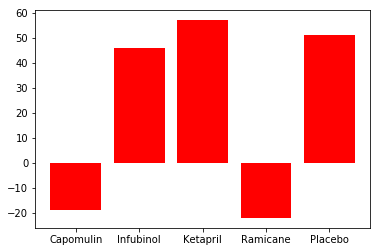

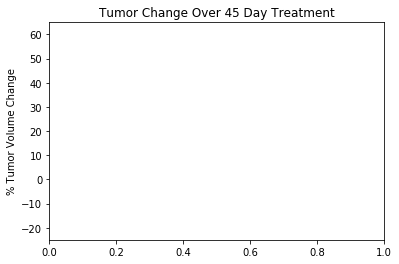

In [70]:
# Splice the data between passing and failing drugs

# plot all on the same graph, indicated here as ax2
#ax2 = plt.gca() + ax = ax2 at end of plt.bar throws: TypeError: inner() got multiple values for argument 'ax' 
# ax = plt.gca) produces same error as above

plt.bar(range(len(drug_percent_changes)), [val[1] for val in drug_percent_changes], align='center', color = 'red')
#, color = ['green' if (drug in drug_percent_changes < 0) else 'red' for drug in drug_percent_changes])
#color = ['green' if (drug in drug_percent_changes < 0) else 'red' for drug in drug_percent_changes]

plt.xticks(range(len(drug_percent_changes)), [val[0] for val in drug_percent_changes])
plt.show()

#if drug in drug_percent_change > 0:
    
# Create a title and y label for our chart
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# Limits for y-axis
plt.ylim(-25,65)

plt.show()

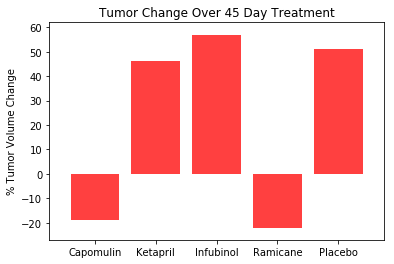

<Figure size 432x288 with 0 Axes>

In [72]:
# dataset
drugs = ['Capomulin', 'Ketapril', 'Infubinol', 'Ramicane','Placebo']
drug_percent_changes_values_list = [capomulin_percent_change, 
                                    infubinol_percent_change, 
                                    ketapril_percent_change, 
                                    ramicane_percent_change, 
                                    placebo_percent_change 
                              ]

x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(min(drug_percent_changes_values_list) - 5, max(drug_percent_changes_values_list) + 5)


plt.bar(x_axis, drug_percent_changes_values_list, alpha=0.75, align="center", color = 'red')
        #color = ['green' if (drug_percent_changes_values_list < 0) else 'red' for drug in drug_percent_changes_values_list])
plt.xticks(tick_locations, drugs)
plt.show()
# Save the Figure
plt.savefig("../Images/SummaryBarGraph.png")

In [36]:

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig("../Images/SummaryBarGraph.png")

# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)